Import pandas, pyplot, and numpy:

In [ ]:
# import pandas
import pandas as pd

# import pyplot
import matplotlib.pyplot as plt

# import numpy
import numpy as np

Load in the merged dataset for Global Development and Global Emissions to use for analysis:

In [ ]:
# load in the merged dataset
df = pd.read_csv('merged_dataset.csv')
df.head()

,Unnamed: 0,Country_Year,Data.Health.Birth Rate,Data.Health.Death Rate,Data.Health.Fertility Rate,"Data.Health.Life Expectancy at Birth, Female","Data.Health.Life Expectancy at Birth, Male","Data.Health.Life Expectancy at Birth, Total",Data.Health.Population Growth,Data.Infrastructure.Mobile Cellular Subscriptions,...,Emissions.Production.CO2.Oil,Emissions.Production.CO2.Flaring,Emissions.Production.CO2.Other,Emissions.Production.CO2.Total,Emissions.Global Share.CO2.Cement,Emissions.Global Share.CO2.Coal,Emissions.Global Share.CO2.Gas,Emissions.Global Share.CO2.Oil,Emissions.Global Share.CO2.Flaring,Emissions.Global Share.CO2.Total
0,0,Canada_1992,14.9,7.2,1.7000,80.77,74.49,77.553415,1.360506,775831.0,...,203.785,12.914,2.962,463.521,0.90,1.27,3.33,2.22,5.44,2.05
1,1,Canada_1994,13.6,6.8,1.7000,80.83,74.69,77.685122,1.094332,1332982.0,...,212.180,14.179,3.236,478.267,0.97,1.20,3.42,2.30,5.98,2.08
2,2,Canada_1995,13.1,7.2,1.6695,80.93,74.94,77.861951,0.961245,1865779.0,...,214.874,14.455,3.210,490.951,1.04,1.18,3.50,2.30,6.15,2.09
3,3,Canada_1996,12.6,7.1,1.6390,81.02,75.08,77.977561,0.828159,2589780.0,...,221.514,15.601,3.218,507.000,0.97,1.17,3.50,2.31,6.58,2.10
4,4,Canada_1997,12.0,7.3,1.5920,81.15,75.45,78.230488,1.077165,3497779.0,...,229.521,15.709,3.447,521.278,1.01,1.26,3.46,2.35,6.47,2.15


To analyze the relationship between phone usage and carbon dioxide emissions, we only need a few of the columns. We need:
* `Country_Year` (as the unit of analysis)
* `Data.Infrastructure.Mobile Cellular Subscriptions`
* `Data.Infrastructure.Mobile Cellular Subscriptions per 100 People`
* `Data.Infrastructure.Telephone Lines`
* `Data.Infrastructure.Telephone Lines per 100 People`
* `Emissions.Production.CO2.Cement`
* `Emissions.Production.CO2.Coal`
* `Emissions.Production.CO2.Gas`
* `Emissions.Production.CO2.Oil`
* `Emissions.Production.CO2.Flaring`
* `Emissions.Production.CO2.Other`
* `Emissions.Production.CO2.Total`

We may not need all of these columns at any given point in the analysis, but this is all we will need to look at the relationship between phone usage in a given country during a given year vs. carbon dioxide emissions from different sources in a given country during a given year.

Each of the `Data.Infrastructure` columns gives some insight into phone usage in a given country during a particular year. Comparing these aspects of development with `Emissions.Production` columns using EDA techniques will let us determine any potential correlations between phone usage and carbon dioxide emissions in a country during a particular year.

In [ ]:
# from the merged dataset, create a new dataset that contains only the columns
# listed above
df_new = df[['Country_Year', 'Data.Infrastructure.Mobile Cellular Subscriptions',
             'Data.Infrastructure.Mobile Cellular Subscriptions per 100 People',
             'Data.Infrastructure.Telephone Lines', 'Data.Infrastructure.Telephone Lines per 100 People',
             'Emissions.Production.CO2.Cement', 'Emissions.Production.CO2.Coal', 'Emissions.Production.CO2.Gas',
             'Emissions.Production.CO2.Oil', 'Emissions.Production.CO2.Flaring', 'Emissions.Production.CO2.Other',
             'Emissions.Production.CO2.Total']]
df_new.head()

,Country_Year,Data.Infrastructure.Mobile Cellular Subscriptions,Data.Infrastructure.Mobile Cellular Subscriptions per 100 People,Data.Infrastructure.Telephone Lines,Data.Infrastructure.Telephone Lines per 100 People,Emissions.Production.CO2.Cement,Emissions.Production.CO2.Coal,Emissions.Production.CO2.Gas,Emissions.Production.CO2.Oil,Emissions.Production.CO2.Flaring,Emissions.Production.CO2.Other,Emissions.Production.CO2.Total
0,Canada_1992,775831.0,2.769888,15814928.0,56.462795,4.804,106.927,132.129,203.785,12.914,2.962,463.521
1,Canada_1994,1332982.0,4.648371,16716802.0,58.294785,5.769,102.541,140.362,212.180,14.179,3.236,478.267
2,Canada_1995,1865779.0,6.435665,17250407.0,59.502136,6.529,104.352,147.531,214.874,14.455,3.210,490.951
3,Canada_1996,2589780.0,8.840379,17567000.0,59.966071,6.185,106.282,154.200,221.514,15.601,3.218,507.000
4,Canada_1997,3497779.0,11.822266,17974000.0,60.750951,6.657,113.174,152.770,229.521,15.709,3.447,521.278


The variable names for each column are very long, so I will shorten the names of most columns.
* `Data.Infrastructure.Mobile Cellular Subscriptions` --> `Cell Subscriptions`
* `Data.Infrastructure.Mobile Cellular Subscriptions per 100 People` --> `Cell Subscriptions per 100 People`
* `Data.Infrastructure.Telephone Lines` --> `Telephone Lines`
* `Data.Infrastructure.Telephone Lines per 100 People` --> `Telephone Lines per 100 People`
* `Emissions.Production.CO2.Cement` --> `CO2 Cement`
* `Emissions.Production.CO2.Coal` --> `CO2 Coal`
* `Emissions.Production.CO2.Gas` --> `CO2 Gas`
* `Emissions.Production.CO2.Oil` --> `CO2 Oil`
* `Emissions.Production.CO2.Flaring` --> `CO2 Flaring`
* `Emissions.Production.CO2.Other` --> `CO2 Other`
* `Emissions.Production.CO2.Total` --> `CO2 Total`

In [ ]:
# shorten the names of the variables
df_new.columns = ['Country_Year', 'Cell Subscriptions',
                  'Cell Subscriptions per 100 People', 'Telephone Lines',
                  'Telephone Lines per 100 People', 'CO2 Cement', 'CO2 Coal',
                  'CO2 Gas', 'CO2 Oil', 'CO2 Flaring', 'CO2 Other', 'CO2 Total']

We need to provide the first two rows of the queried dataset, which are given below:

In [ ]:
# display only the first two rows of the queried dataset
df_new.head(2)

,Country_Year,Cell Subscriptions,Cell Subscriptions per 100 People,Telephone Lines,Telephone Lines per 100 People,CO2 Cement,CO2 Coal,CO2 Gas,CO2 Oil,CO2 Flaring,CO2 Other,CO2 Total
0,Canada_1992,775831.0,2.769888,15814928.0,56.462795,4.804,106.927,132.129,203.785,12.914,2.962,463.521
1,Canada_1994,1332982.0,4.648371,16716802.0,58.294785,5.769,102.541,140.362,212.180,14.179,3.236,478.267


The following code can be run to save the queried dataset as a csv file, which can then be downloaded. The resulting csv file has been added to the project GitHub.

In [ ]:
# download the queried dataset with shortened column names
df_new.to_csv('queried_dataset.csv', index=False)

This likely will not be on the final Homework 6 document, but I wanted to see the distribution of telephone lines per 100 people as a boxplot compared to the distribution of cell subscriptions per 100 people.

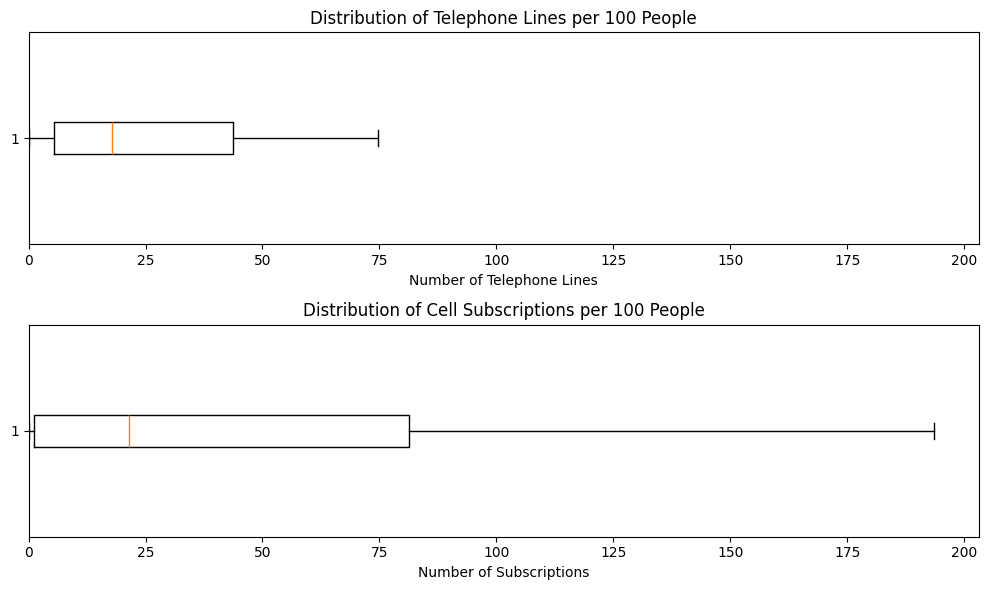

In [ ]:
# find the maximum value for columns to set a common y-axis
max_value = max(df_new['Telephone Lines per 100 People'].max(),
                df_new['Cell Subscriptions per 100 People'].max())

# create the boxplot for Telephone Lines per 100 People
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.boxplot(df_new['Telephone Lines per 100 People'].dropna(), vert=False)
plt.title('Distribution of Telephone Lines per 100 People')
plt.xlabel('Number of Telephone Lines')
plt.xlim(0, max_value * 1.05)

# create the boxplot for Cell Subscriptions per 100 People
plt.subplot(2, 1, 2)
plt.boxplot(df_new['Cell Subscriptions per 100 People'].dropna(), vert=False)
plt.title('Distribution of Cell Subscriptions per 100 People')
plt.xlabel('Number of Subscriptions')
plt.xlim(0, max_value * 1.05)

plt.tight_layout()
plt.show()

This likely also will not be on the final Homework 6 document, but I was curious to see what the above information would look like as a histogram rather than a boxplot.

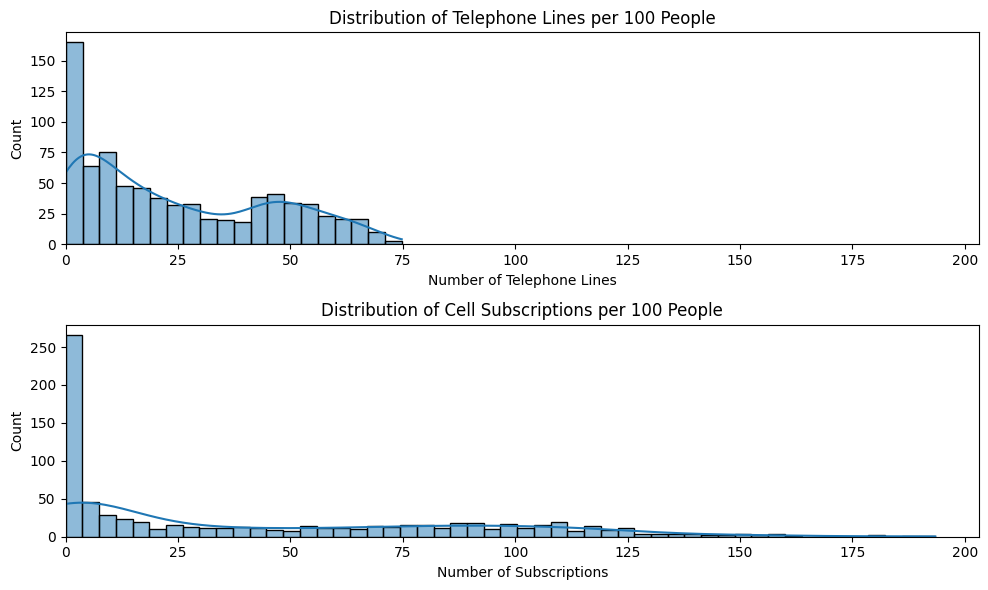

In [ ]:
# do exactly the same thing as in the above but with a histogram instead of a
# boxplot
import seaborn as sns

# create the histogram for Telephone Lines per 100 People
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
sns.histplot(df_new['Telephone Lines per 100 People'].dropna(), bins=20,
             kde=True)
plt.title('Distribution of Telephone Lines per 100 People')
plt.xlabel('Number of Telephone Lines')
plt.xlim(0, max_value * 1.05)

# create the histogram for Cell Subscriptions per 100 People
plt.subplot(2, 1, 2)
sns.histplot(df_new['Cell Subscriptions per 100 People'].dropna(), bins=52,
             kde=True)
plt.title('Distribution of Cell Subscriptions per 100 People')
plt.xlabel('Number of Subscriptions')
plt.xlim(0, max_value * 1.05)

plt.tight_layout()
plt.show()

I would hypothesize that there would be a strong linear correlation between the number of telephone lines in a country and the amount of $CO_2$ produced that year in that particular country.

The following is a grid of scatterplots to compare the number of telephones in a country during a particular year to the amount of $CO_2$ produced (in kilotons) in that country and year. Each scatterplot visualizes the correlation between telephone lines and different methods of releasing $CO_2$. The red line for each scatterplot is a line of best fit that shows how closely the linear regression model fits the data. The $R^2$ value is also given for each scatterplot to determine how well the linear regression model fits each pair of variables.

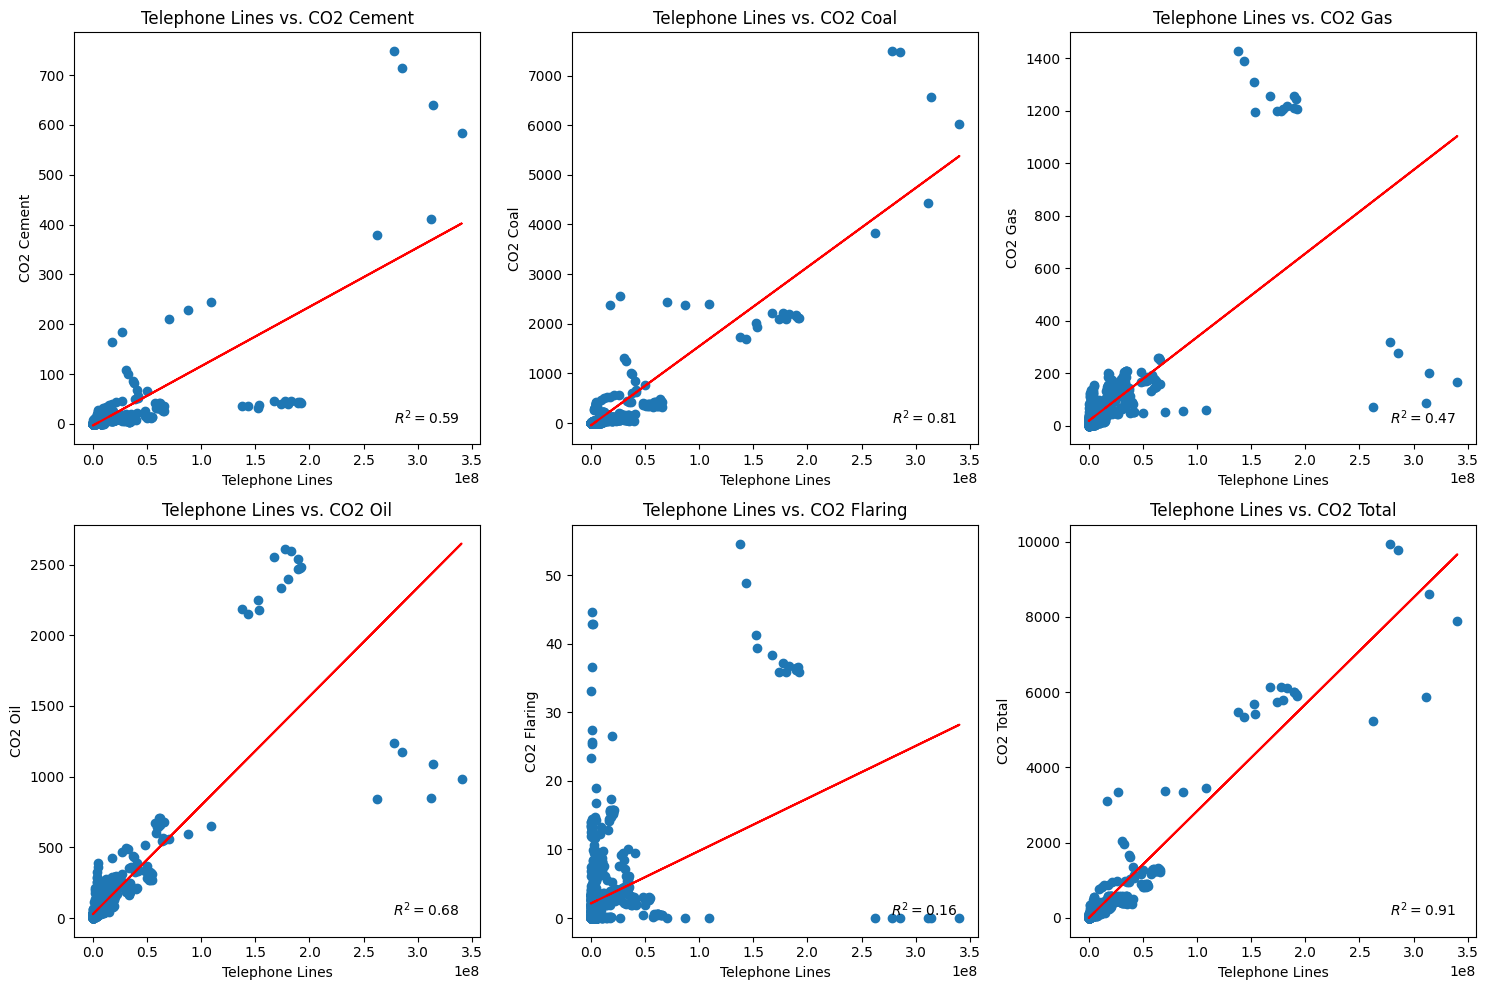

In [ ]:
from sklearn.linear_model import LinearRegression

# CO2 variables
co2_vars = ['CO2 Cement', 'CO2 Coal', 'CO2 Gas', 'CO2 Oil', 'CO2 Flaring', 'CO2 Total']

# create a grid of scatterplots for Telephone Lines vs. CO2
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(co2_vars):
    x = np.array(df_new['Telephone Lines']).reshape(-1, 1)
    y = np.array(df_new[var])
    model = LinearRegression().fit(x, y)

    axes[i].scatter(x, y)
    axes[i].plot(x, model.predict(x), color='red')
    axes[i].set_xlabel('Telephone Lines')
    axes[i].set_ylabel(var)
    axes[i].set_title(f'Telephone Lines vs. {var}')

    # find r^2 and print it at the bottom right of the scatterplot
    r_squared = model.score(x, y)
    axes[i].text(0.95, 0.05, f'$R^2 = {r_squared:.2f}$', transform=axes[i].transAxes, ha='right')

plt.tight_layout()
plt.show()

The following is a grid of scatterplots to compare the number of cell subscriptions in a country during a particular year to the amount of $CO_2$ produced (in kilotons) in that country and year. Each scatterplot visualizes the correlation between cell subscriptions and different methods of releasing $CO_2$. The red line for each scatterplot is a line of best fit that shows how closely the linear regression model fits the data. The $R^2$ value is also given for each scatterplot to determine how well the linear regression model fits each pair of variables.

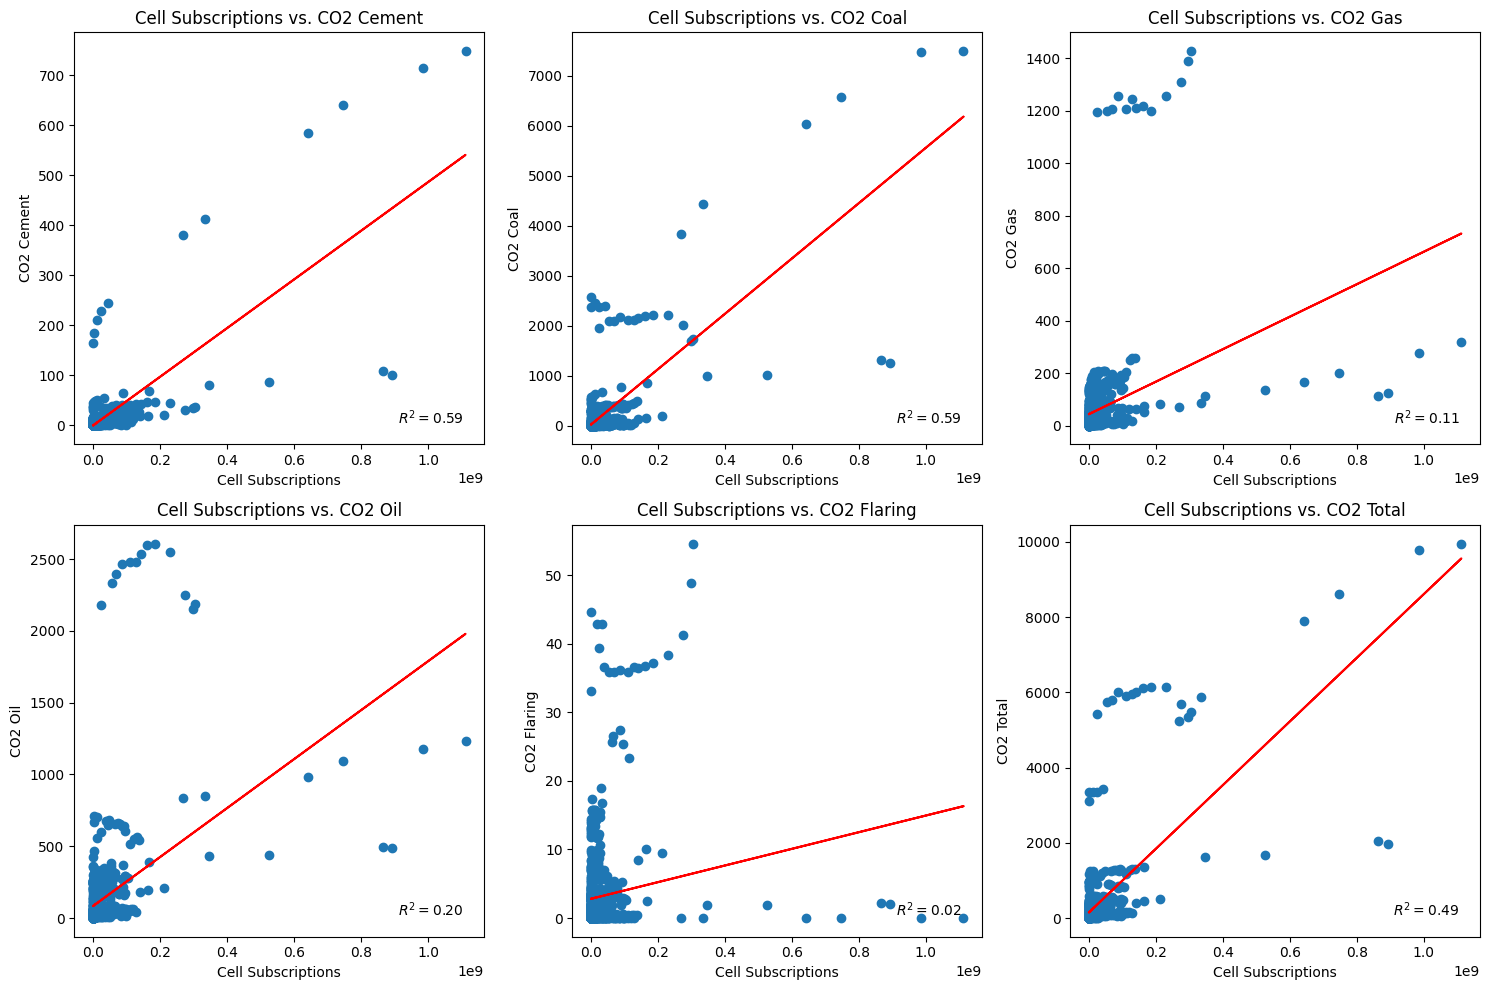

In [ ]:
# this uses the same code above but for 'Cell Subscriptions' instead of
# 'Telephone Lines'

# create a grid of scatterpolots for Cell Subscriptions vs. CO2
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(co2_vars):
    x = np.array(df_new['Cell Subscriptions']).reshape(-1, 1)
    y = np.array(df_new[var])
    model = LinearRegression().fit(x, y)

    axes[i].scatter(x, y)
    axes[i].plot(x, model.predict(x), color='red')
    axes[i].set_xlabel('Cell Subscriptions')
    axes[i].set_ylabel(var)
    axes[i].set_title(f'Cell Subscriptions vs. {var}')

    # find r^2 and print it at the bottom right of the scatterplot
    r_squared = model.score(x, y)
    axes[i].text(0.95, 0.05, f'$R^2 = {r_squared:.2f}$', transform=axes[i].transAxes, ha='right')

plt.tight_layout()
plt.show()

The line plot below shows how the number of telephone lines as well as the amount of $CO_2$ emissions changes over time in the country of Canada. The axes are not to scale with one another, but the plot does show that there are upward trends for both variables until around 2003, where they either stabilize or start to decrease.

I ran the same code but with different country names to make several plots throughout this Colab:
* Canada
* United States
* India
* Gabon
* Cyprus
* South Africa

The code can also be run for any other country name that appears in the dataset by changing the filter in the first line.

<ipython-input-18-49fa2ee9cc62>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Year'] = country_data['Country_Year'].str.split('_').str[1].astype(int)


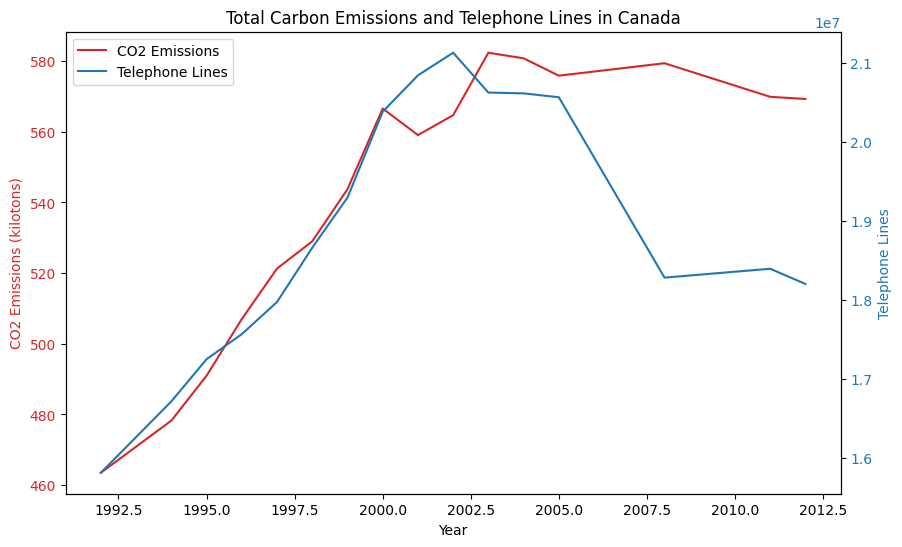

In [ ]:
# filter data for Canada
country_data = df_new[df_new['Country_Year'].str.startswith('Canada_')]

# get only the year, total CO2 emissions, and telephone lines from the data
country_data['Year'] = country_data['Country_Year'].str.split('_').str[1].astype(int)
country_co2 = country_data[['Year', 'CO2 Total', 'Telephone Lines']]

# create the line graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# plot CO2 emissions on the left y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 Emissions (kilotons)', color='tab:red')
ax1.plot(country_co2['Year'], country_co2['CO2 Total'], color='tab:red', label='CO2 Emissions')
ax1.tick_params(axis='y', labelcolor='tab:red')

# plot Telephone Lines on the right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Telephone Lines', color='tab:blue')
ax2.plot(country_co2['Year'], country_co2['Telephone Lines'], color='tab:blue', label='Telephone Lines')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# combine the legends of both plots
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Total Carbon Emissions and Telephone Lines in Canada')
plt.show()

<ipython-input-20-b0ad8fa120b4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Year'] = country_data['Country_Year'].str.split('_').str[1].astype(int)


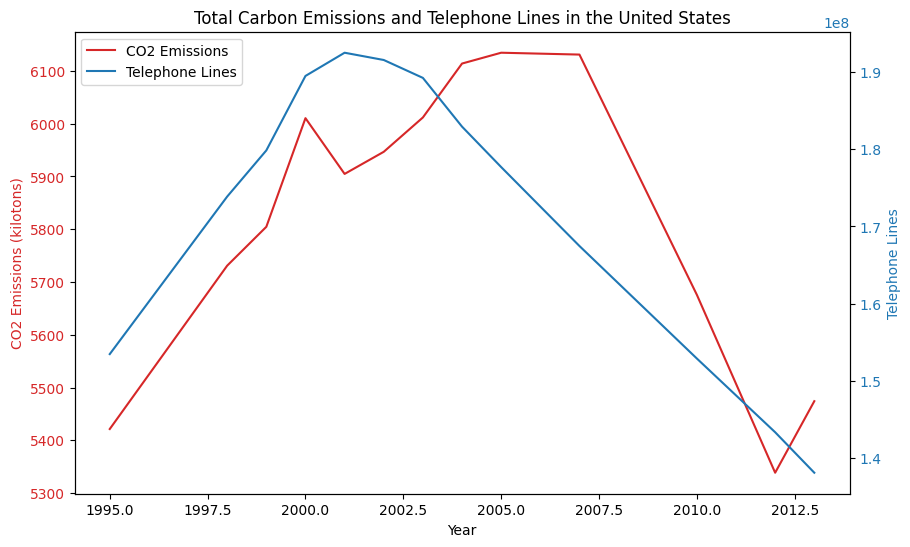

In [ ]:
# this uses the same code as above but for countries other than Canada

# filter data for the United States
country_data = df_new[df_new['Country_Year'].str.startswith('United States_')]

# get only the year, total CO2 emissions, and telephone lines from the data
country_data['Year'] = country_data['Country_Year'].str.split('_').str[1].astype(int)
country_co2 = country_data[['Year', 'CO2 Total', 'Telephone Lines']]

# create the line graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# plot CO2 emissions on the left y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 Emissions (kilotons)', color='tab:red')
ax1.plot(country_co2['Year'], country_co2['CO2 Total'], color='tab:red', label='CO2 Emissions')
ax1.tick_params(axis='y', labelcolor='tab:red')

# plot Telephone Lines on the right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Telephone Lines', color='tab:blue')
ax2.plot(country_co2['Year'], country_co2['Telephone Lines'], color='tab:blue', label='Telephone Lines')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# combine the legends of both plots
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Total Carbon Emissions and Telephone Lines in the United States')
plt.show()

<ipython-input-21-db17e9075837>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Year'] = country_data['Country_Year'].str.split('_').str[1].astype(int)


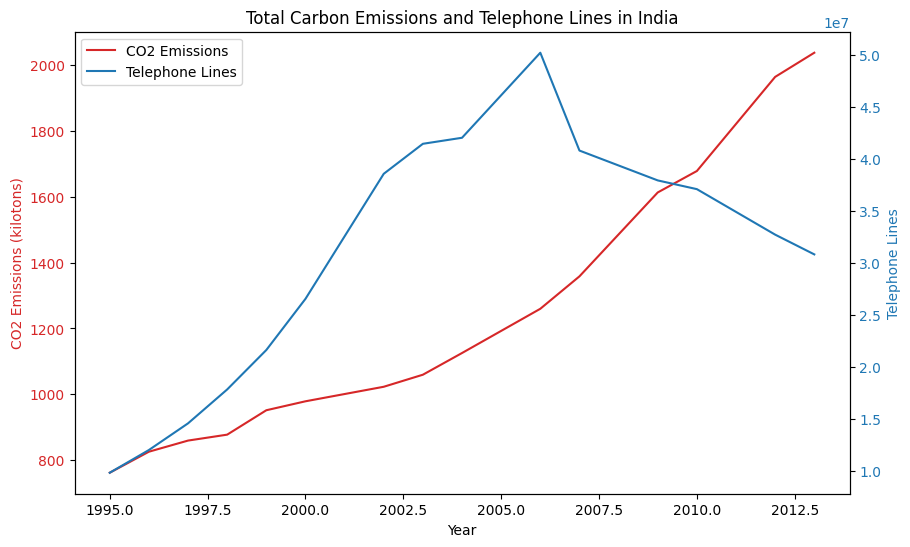

In [ ]:
# this uses the same code as above but for countries other than Canada

# filter data for India
country_data = df_new[df_new['Country_Year'].str.startswith('India_')]

# get only the year, total CO2 emissions, and telephone lines from the data
country_data['Year'] = country_data['Country_Year'].str.split('_').str[1].astype(int)
country_co2 = country_data[['Year', 'CO2 Total', 'Telephone Lines']]

# create the line graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# plot CO2 emissions on the left y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 Emissions (kilotons)', color='tab:red')
ax1.plot(country_co2['Year'], country_co2['CO2 Total'], color='tab:red', label='CO2 Emissions')
ax1.tick_params(axis='y', labelcolor='tab:red')

# plot Telephone Lines on the right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Telephone Lines', color='tab:blue')
ax2.plot(country_co2['Year'], country_co2['Telephone Lines'], color='tab:blue', label='Telephone Lines')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# combine the legends of both plots
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Total Carbon Emissions and Telephone Lines in India')
plt.show()

<ipython-input-22-cd96e78e0cc0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Year'] = country_data['Country_Year'].str.split('_').str[1].astype(int)


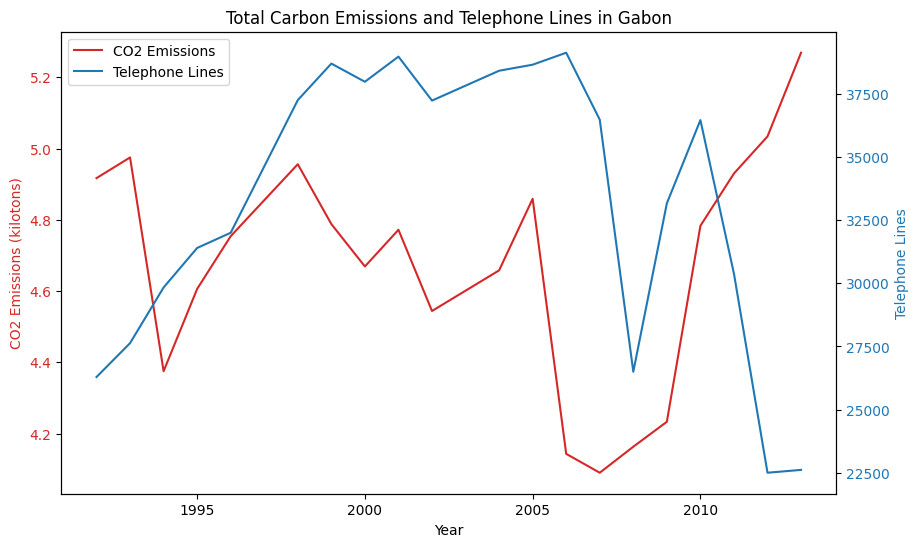

In [ ]:
# this uses the same code as above but for countries other than Canada

# filter data for Gabon
country_data = df_new[df_new['Country_Year'].str.startswith('Gabon_')]

# get only the year, total CO2 emissions, and telephone lines from the data
country_data['Year'] = country_data['Country_Year'].str.split('_').str[1].astype(int)
country_co2 = country_data[['Year', 'CO2 Total', 'Telephone Lines']]

# create the line graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# plot CO2 emissions on the left y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 Emissions (kilotons)', color='tab:red')
ax1.plot(country_co2['Year'], country_co2['CO2 Total'], color='tab:red', label='CO2 Emissions')
ax1.tick_params(axis='y', labelcolor='tab:red')

# plot Telephone Lines on the right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Telephone Lines', color='tab:blue')
ax2.plot(country_co2['Year'], country_co2['Telephone Lines'], color='tab:blue', label='Telephone Lines')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# combine the legends of both plots
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Total Carbon Emissions and Telephone Lines in Gabon')
plt.show()

<ipython-input-23-5d50e84c04ca>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Year'] = country_data['Country_Year'].str.split('_').str[1].astype(int)


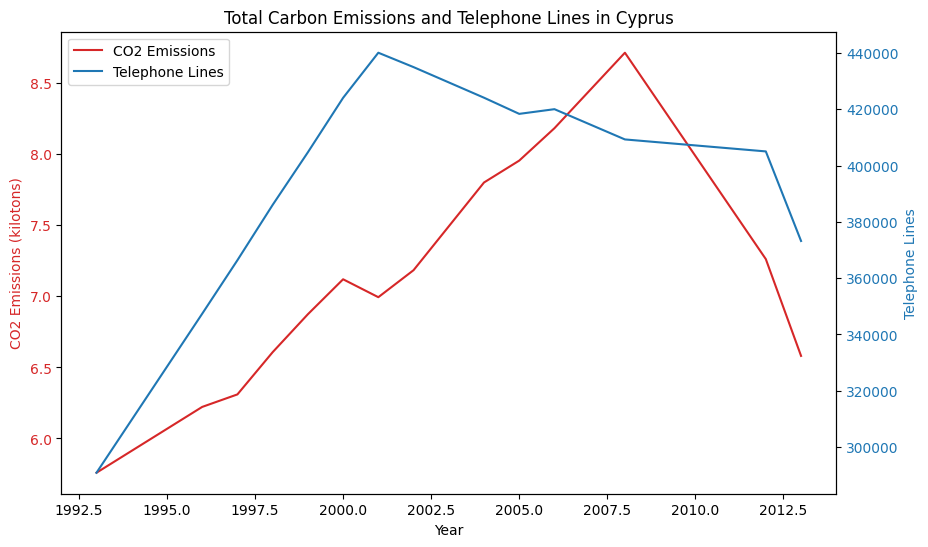

In [ ]:
# this uses the same code as above but for countries other than Canada

# filter data for Cyprus
country_data = df_new[df_new['Country_Year'].str.startswith('Cyprus_')]

# get only the year, total CO2 emissions, and telephone lines from the data
country_data['Year'] = country_data['Country_Year'].str.split('_').str[1].astype(int)
country_co2 = country_data[['Year', 'CO2 Total', 'Telephone Lines']]

# create the line graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# plot CO2 emissions on the left y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 Emissions (kilotons)', color='tab:red')
ax1.plot(country_co2['Year'], country_co2['CO2 Total'], color='tab:red', label='CO2 Emissions')
ax1.tick_params(axis='y', labelcolor='tab:red')

# plot Telephone Lines on the right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Telephone Lines', color='tab:blue')
ax2.plot(country_co2['Year'], country_co2['Telephone Lines'], color='tab:blue', label='Telephone Lines')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# combine the legends of both plots
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Total Carbon Emissions and Telephone Lines in Cyprus')
plt.show()

<ipython-input-24-e6fd524fa179>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Year'] = country_data['Country_Year'].str.split('_').str[1].astype(int)


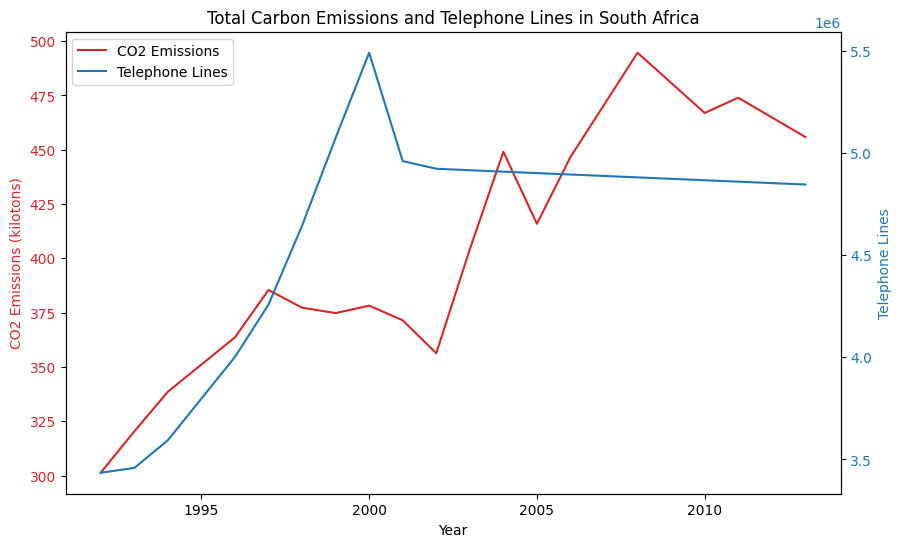

In [ ]:
# this uses the same code as above but for countries other than Canada

# filter data for South Africa
country_data = df_new[df_new['Country_Year'].str.startswith('South Africa_')]

# get only the year, total CO2 emissions, and telephone lines from the data
country_data['Year'] = country_data['Country_Year'].str.split('_').str[1].astype(int)
country_co2 = country_data[['Year', 'CO2 Total', 'Telephone Lines']]

# create the line graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# plot CO2 emissions on the left y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 Emissions (kilotons)', color='tab:red')
ax1.plot(country_co2['Year'], country_co2['CO2 Total'], color='tab:red', label='CO2 Emissions')
ax1.tick_params(axis='y', labelcolor='tab:red')

# plot Telephone Lines on the right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Telephone Lines', color='tab:blue')
ax2.plot(country_co2['Year'], country_co2['Telephone Lines'], color='tab:blue', label='Telephone Lines')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# combine the legends of both plots
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Total Carbon Emissions and Telephone Lines in South Africa')
plt.show()